Stream B: XENA UCSC's STAR aligned dataset

In [1]:
import pandas as pd
import numpy as np
import pycombat
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# --- 1. Define File Paths ---
b_xena_expression_filepath = "data/raw/TcgaTargetGtex_rsem_gene_tpm.gz" 
b_xena_metadata_filepath = "data/raw/TcgaTargetGTEX_phenotype.txt.gz"

In [4]:
# --- 2. Load Expression Data ---
# sep='\t' means the file is tab-separated.
# set_index('sample') makes the gene IDs the rows.
b_xena_expression_df = pd.read_csv(
    b_xena_expression_filepath, 
    sep='\t', 
    index_col=0,  # Assumes the first column is the gene/sample name
    compression='gzip' # if your file ends in .gz
)

# --- 3. Load Metadata ---
b_xena_metadata_df = pd.read_csv(
    b_xena_metadata_filepath, 
    sep='\t',
    encoding='latin-1'
)

# # --- 4. Verify ---
print("--- Pipeline B (Xena) ---")
print("Expression Shape:", b_xena_expression_df.shape)
display(b_xena_expression_df.head())

print("\nMetadata Shape:", b_xena_metadata_df.shape)
display(b_xena_metadata_df.head())

--- Pipeline B (Xena) ---
Expression Shape: (60498, 19131)


,GTEX-S4Q7-0003-SM-3NM8M,TCGA-19-1787-01,TCGA-S9-A7J2-01,GTEX-QV31-1626-SM-2S1QC,TCGA-G3-A3CH-11,TCGA-B5-A5OE-01,GTEX-13QIC-0011-R1a-SM-5O9CJ,TCGA-B2-5641-11,GTEX-ZPCL-0126-SM-4WWC8,TARGET-20-PANGDN-09,...,TCGA-FI-A2EY-01,TCGA-55-6985-11,TCGA-EJ-5527-01,TCGA-G3-A25X-01,TCGA-24-2254-01,GTEX-11ZTS-3326-SM-5LU9Y,GTEX-VJYA-0726-SM-4KL1T,GTEX-ZA64-2126-SM-5Q5A8,GTEX-Q2AG-2826-SM-2HMJQ,GTEX-XV7Q-0426-SM-4BRVN
sample,,,,,,,,,,,,,,,,,,,,,
ENSG00000242268.2,-3.4580,-9.9658,0.2998,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-4.0350,-2.0529,-9.9658,-9.9658,-1.9379,1.5165,-9.9658,-2.3884,0.0440,-3.3076
ENSG00000259041.1,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658
ENSG00000270112.3,-3.6259,-3.8160,-3.0469,-2.1779,-9.9658,-9.9658,-1.8314,-2.4659,-9.9658,-9.9658,...,-3.1714,-4.2934,-9.9658,-9.9658,-5.5735,-2.9324,-9.9658,-9.9658,2.5852,-3.0469
ENSG00000167578.16,4.5988,5.2998,4.8881,4.6294,3.5572,5.0858,6.4989,4.6317,5.5358,4.1376,...,4.7253,5.4206,4.4771,5.2627,5.0760,6.0809,4.7410,5.3212,5.8110,5.9132
ENSG00000278814.1,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658



Metadata Shape: (19131, 7)


,sample,detailed_category,primary disease or tissue,_primary_site,_sample_type,_gender,_study
0,TCGA-V4-A9EE-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
1,TCGA-VD-AA8N-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
2,TCGA-V4-A9EI-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
3,TCGA-VD-AA8O-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
4,TCGA-WC-A888-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA


In [5]:
b_xena_expression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60498 entries, ENSG00000242268.2 to ENSG00000181518.3
Columns: 19131 entries, GTEX-S4Q7-0003-SM-3NM8M to GTEX-XV7Q-0426-SM-4BRVN
dtypes: float64(19131)
memory usage: 8.6+ GB


### Distribution

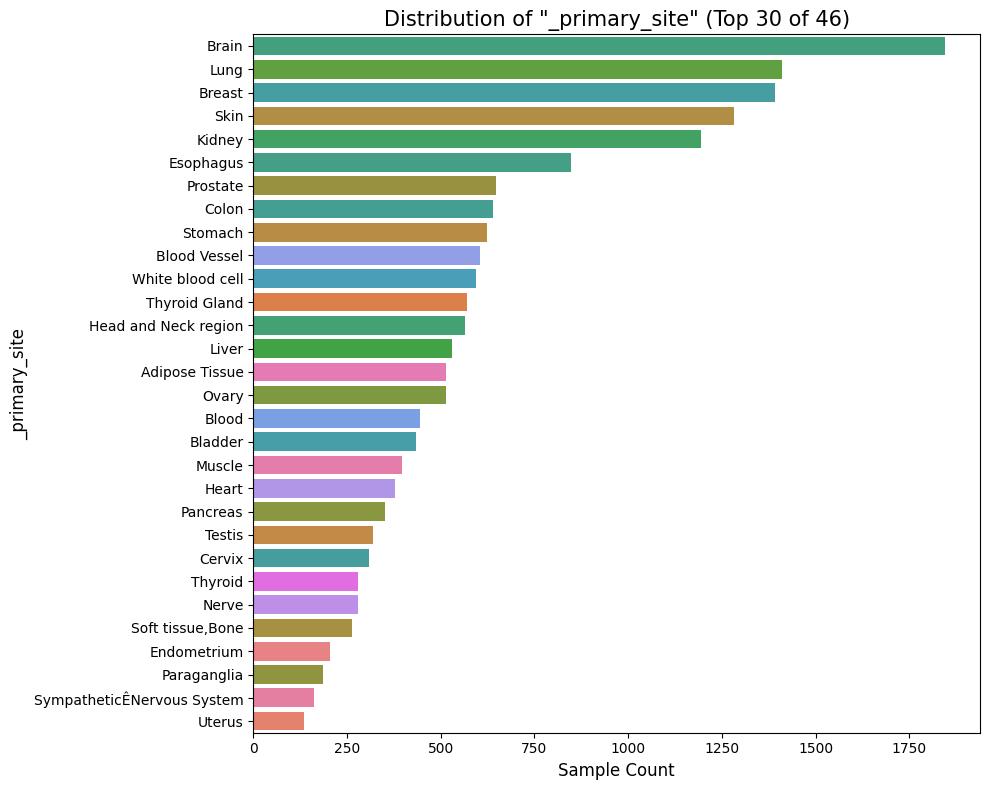

In [6]:
col = '_primary_site'
plt.figure(figsize=(10, 8))

top_n = 30
num_categories = b_xena_metadata_df[col].nunique()

if num_categories > top_n:
    plot_title = f'Distribution of "{col}" (Top {top_n} of {num_categories})'
    top_categories = b_xena_metadata_df[col].value_counts().nlargest(top_n).index
else:
    plot_title = f'Distribution of "{col}" (All {num_categories})'
    top_categories = b_xena_metadata_df[col].value_counts().index

sns.countplot(
    y=col, 
    data=b_xena_metadata_df, 
    order=top_categories,
    hue=col,
    legend=False
)

plt.title(plot_title, fontsize=15)
plt.xlabel('Sample Count', fontsize=12)
plt.ylabel(col, fontsize=12)
plt.tight_layout()
plt.show() # Display the plot

In [7]:
# We use .str.startswith('Brain') to get 'Brain' (TCGA) AND 'Brain - ...' (GTEx)
filter_condition = b_xena_metadata_df['_primary_site'].str.startswith('Brain', na=False)
b_xena_metadata_brain_df = b_xena_metadata_df[filter_condition]

# --- Verification ---
print(f"Original shape: {b_xena_metadata_df.shape}")
print(f"Filtered (Brain only) shape: {b_xena_metadata_brain_df.shape}")

original_studies = set(b_xena_metadata_df['_study'])
filtered_studies = set(b_xena_metadata_brain_df['_study'])

print(f"\nOriginal studies: {original_studies}")
print(f"Filtered studies: {filtered_studies}")

if 'TARGET' in original_studies and 'TARGET' not in filtered_studies:
    print("Observation confirmed: 'TARGET' samples were successfully filtered out.")

Original shape: (19131, 7)
Filtered (Brain only) shape: (1846, 7)

Original studies: {'GTEX', 'TARGET', 'TCGA'}
Filtered studies: {'GTEX', 'TCGA'}
Observation confirmed: 'TARGET' samples were successfully filtered out.


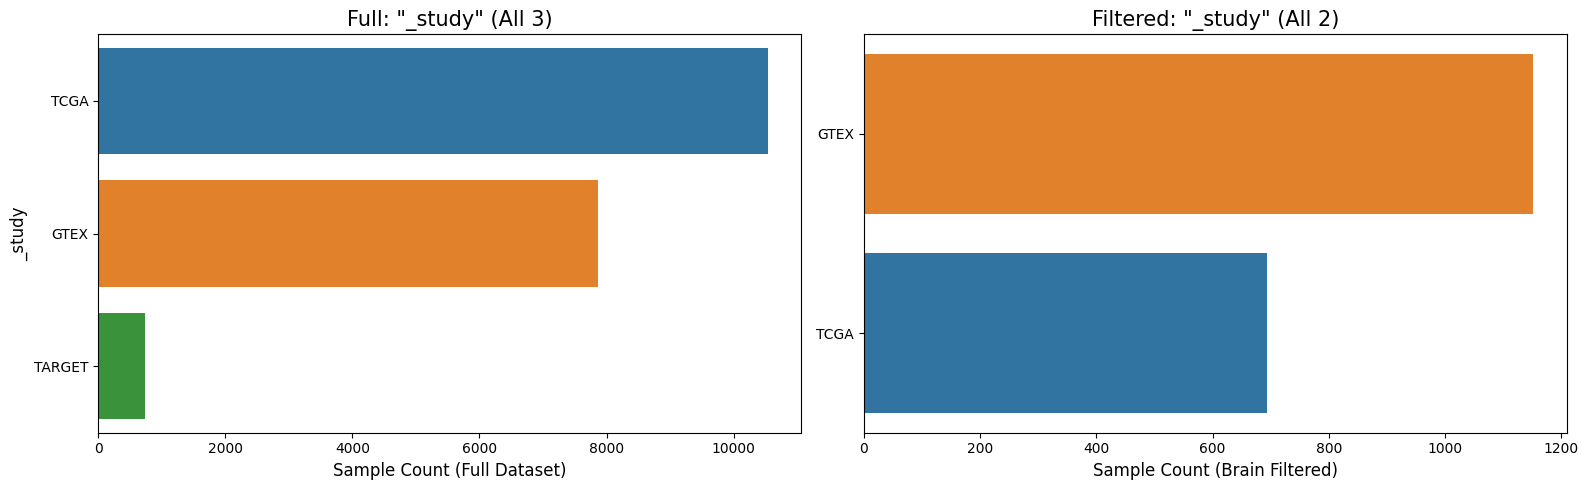

In [8]:
col = '_study'
# Create a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# --- Left Plot (Full Dataset) ---
top_n_left = 30
num_cat_left = b_xena_metadata_df[col].nunique()
if num_cat_left > top_n_left:
    title_left = f'Full: "{col}" (Top {top_n_left} of {num_cat_left})'
    top_cat_left = b_xena_metadata_df[col].value_counts().nlargest(top_n_left).index
else:
    title_left = f'Full: "{col}" (All {num_cat_left})'
    top_cat_left = b_xena_metadata_df[col].value_counts().index
    
sns.countplot(y=col, data=b_xena_metadata_df, order=top_cat_left, hue=col, legend=False, ax=ax1)
ax1.set_title(title_left, fontsize=15)
ax1.set_xlabel('Sample Count (Full Dataset)', fontsize=12)
ax1.set_ylabel(col, fontsize=12)

# --- Right Plot (Filtered Dataset) ---
top_n_right = 30
num_cat_right = b_xena_metadata_brain_df[col].nunique()
if num_cat_right > top_n_right:
    title_right = f'Filtered: "{col}" (Top {top_n_right} of {num_cat_right})'
    top_cat_right = b_xena_metadata_brain_df[col].value_counts().nlargest(top_n_right).index
else:
    title_right = f'Filtered: "{col}" (All {num_cat_right})'
    top_cat_right = b_xena_metadata_brain_df[col].value_counts().index
    
sns.countplot(y=col, data=b_xena_metadata_brain_df, order=top_cat_right, hue=col, legend=False, ax=ax2)
ax2.set_title(title_right, fontsize=15)
ax2.set_xlabel('Sample Count (Brain Filtered)', fontsize=12)
ax2.set_ylabel(None) # Remove redundant y-label

plt.tight_layout()
plt.show()

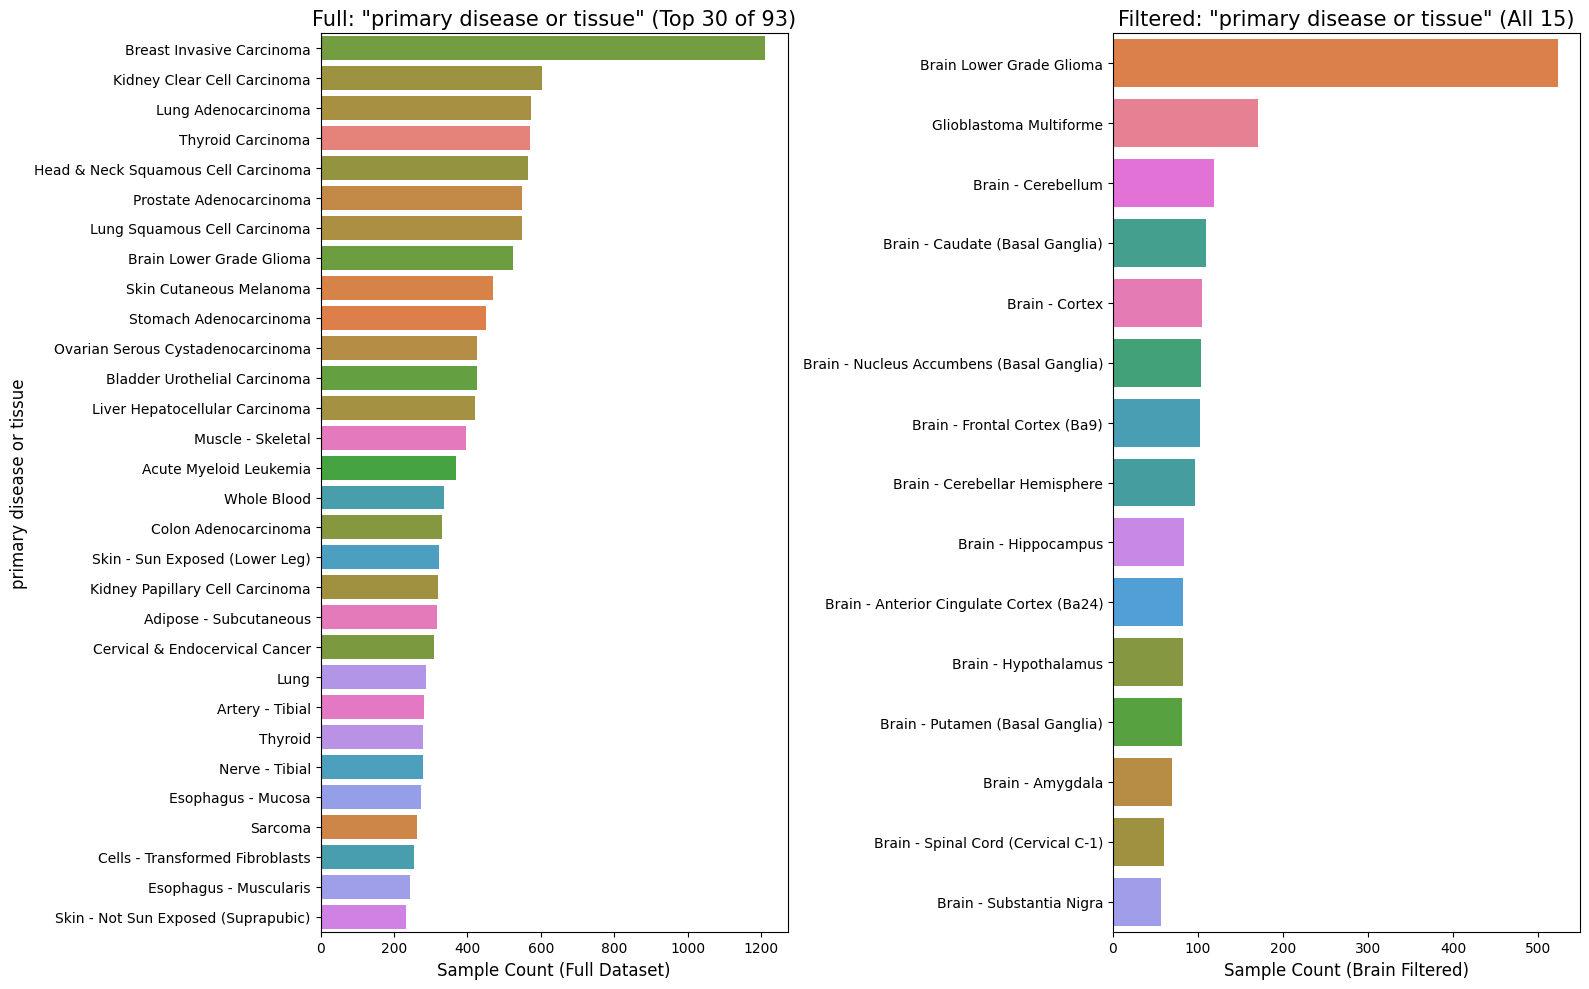

In [9]:
col = 'primary disease or tissue'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

# --- Left Plot (Full Dataset) ---
top_n_left = 30
num_cat_left = b_xena_metadata_df[col].nunique()
if num_cat_left > top_n_left:
    title_left = f'Full: "{col}" (Top {top_n_left} of {num_cat_left})'
    top_cat_left = b_xena_metadata_df[col].value_counts().nlargest(top_n_left).index
else:
    title_left = f'Full: "{col}" (All {num_cat_left})'
    top_cat_left = b_xena_metadata_df[col].value_counts().index
    
sns.countplot(y=col, data=b_xena_metadata_df, order=top_cat_left, hue=col, legend=False, ax=ax1)
ax1.set_title(title_left, fontsize=15)
ax1.set_xlabel('Sample Count (Full Dataset)', fontsize=12)
ax1.set_ylabel(col, fontsize=12)

# --- Right Plot (Filtered Dataset) ---
top_n_right = 30
num_cat_right = b_xena_metadata_brain_df[col].nunique()
if num_cat_right > top_n_right:
    title_right = f'Filtered: "{col}" (Top {top_n_right} of {num_cat_right})'
    top_cat_right = b_xena_metadata_brain_df[col].value_counts().nlargest(top_n_right).index
else:
    title_right = f'Filtered: "{col}" (All {num_cat_right})'
    top_cat_right = b_xena_metadata_brain_df[col].value_counts().index
    
sns.countplot(y=col, data=b_xena_metadata_brain_df, order=top_cat_right, hue=col, legend=False, ax=ax2)
ax2.set_title(title_right, fontsize=15)
ax2.set_xlabel('Sample Count (Brain Filtered)', fontsize=12)
ax2.set_ylabel(None) # Remove redundant y-label

plt.tight_layout()
plt.show()

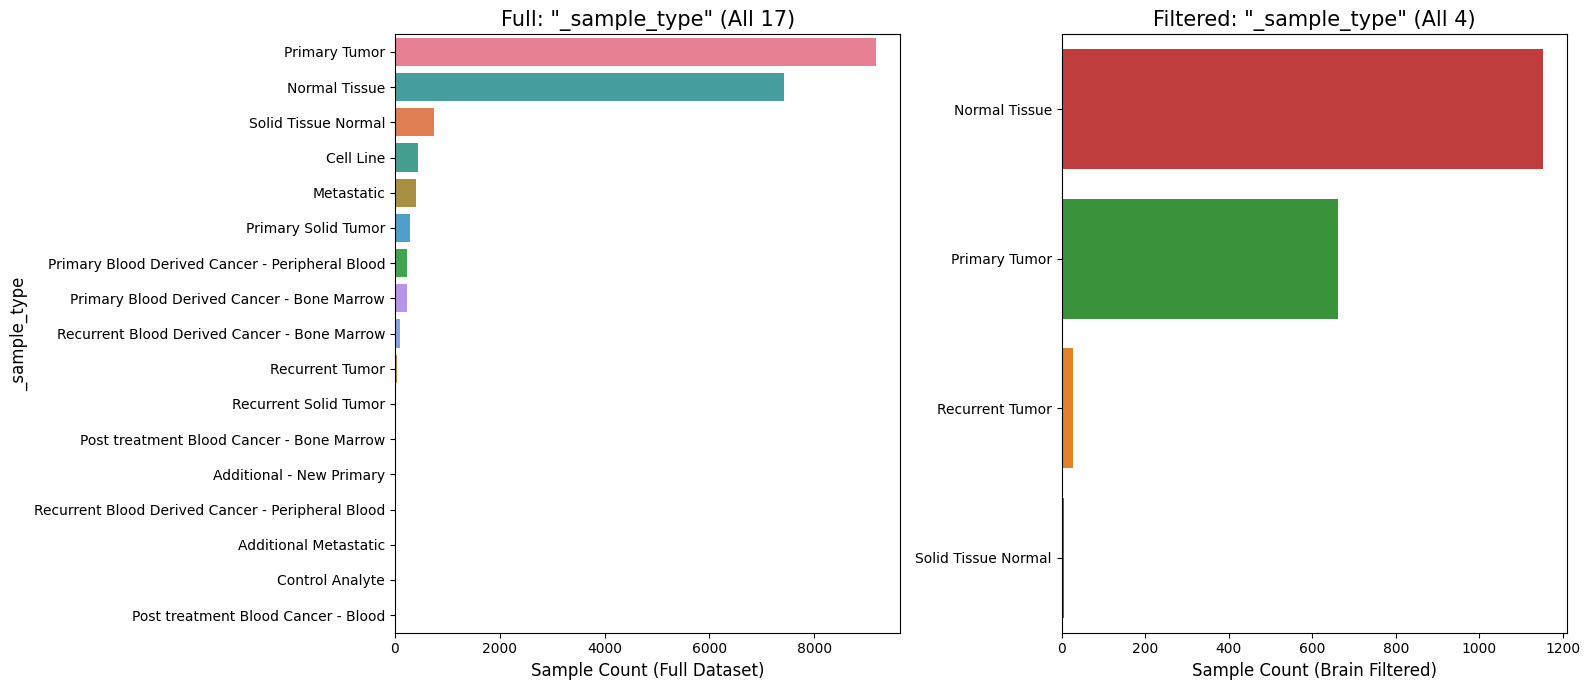

In [10]:
col = '_sample_type'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# --- Left Plot (Full Dataset) ---
top_n_left = 30
num_cat_left = b_xena_metadata_df[col].nunique()
if num_cat_left > top_n_left:
    title_left = f'Full: "{col}" (Top {top_n_left} of {num_cat_left})'
    top_cat_left = b_xena_metadata_df[col].value_counts().nlargest(top_n_left).index
else:
    title_left = f'Full: "{col}" (All {num_cat_left})'
    top_cat_left = b_xena_metadata_df[col].value_counts().index
    
sns.countplot(y=col, data=b_xena_metadata_df, order=top_cat_left, hue=col, legend=False, ax=ax1)
ax1.set_title(title_left, fontsize=15)
ax1.set_xlabel('Sample Count (Full Dataset)', fontsize=12)
ax1.set_ylabel(col, fontsize=12)

# --- Right Plot (Filtered Dataset) ---
top_n_right = 30
num_cat_right = b_xena_metadata_brain_df[col].nunique()
if num_cat_right > top_n_right:
    title_right = f'Filtered: "{col}" (Top {top_n_right} of {num_cat_right})'
    top_cat_right = b_xena_metadata_brain_df[col].value_counts().nlargest(top_n_right).index
else:
    title_right = f'Filtered: "{col}" (All {num_cat_right})'
    top_cat_right = b_xena_metadata_brain_df[col].value_counts().index
    
sns.countplot(y=col, data=b_xena_metadata_brain_df, order=top_cat_right, hue=col, legend=False, ax=ax2)
ax2.set_title(title_right, fontsize=15)
ax2.set_xlabel('Sample Count (Brain Filtered)', fontsize=12)
ax2.set_ylabel(None) # Remove redundant y-label

plt.tight_layout()
plt.show()

In [11]:
b_xena_metadata_brain_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1846 entries, 7025 to 16193
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   sample                     1846 non-null   object
 1   detailed_category          1846 non-null   object
 2   primary disease or tissue  1846 non-null   object
 3   _primary_site              1846 non-null   object
 4   _sample_type               1846 non-null   object
 5   _gender                    1839 non-null   object
 6   _study                     1846 non-null   object
dtypes: object(7)
memory usage: 115.4+ KB


In [36]:
# Group 1: Unhealthy (TCGA GBM Primary Tumors)
filter_unhealthy = (
    # (b_xena_metadata_brain_df['_study'] == 'TCGA') &
    # (b_xena_metadata_brain_df['primary disease or tissue'] == 'Glioblastoma Multiforme') &
    (b_xena_metadata_brain_df['_sample_type'] == 'Primary Tumor')
)
b_gbm_metadata = b_xena_metadata_brain_df[filter_unhealthy]

# Group 2: Healthy (GTEX Healthy Brain)
filter_healthy = (
    # (b_xena_metadata_brain_df['_study'] == 'GTEX') &
    # (b_xena_metadata_brain_df['_primary_site'].str.startswith('Brain', na=False)) &
    (b_xena_metadata_brain_df['_sample_type'] == 'Normal Tissue')
)
b_gtex_metadata = b_xena_metadata_brain_df[filter_healthy]

print(f"Created Unhealthy (GBM) group with {len(b_gbm_metadata)} samples.")
print(f"Created Healthy (GTEX) group with {len(b_gtex_metadata)} samples.")

Created Unhealthy (GBM) group with 662 samples.
Created Healthy (GTEX) group with 1152 samples.


In [ ]:
# --- 2. Create a combined DataFrame for plotting ---
    
# We use .copy() to avoid a SettingWithCopyWarning
b_gbm_plot_df = b_gbm_metadata.copy()
b_gbm_plot_df['label'] = 'GBM (Unhealthy)'

b_gtex_plot_df = b_gtex_metadata.copy()
b_gtex_plot_df['label'] = 'Healthy (GTEX)'

# Concatenate them
b_combined_metadata = pd.concat([b_gbm_plot_df, b_gtex_plot_df])

In [38]:
b_combined_metadata.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1814 entries, 7043 to 16193
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   sample                     1814 non-null   object
 1   detailed_category          1814 non-null   object
 2   primary disease or tissue  1814 non-null   object
 3   _primary_site              1814 non-null   object
 4   _sample_type               1814 non-null   object
 5   _gender                    1812 non-null   object
 6   _study                     1814 non-null   object
 7   label                      1814 non-null   object
dtypes: object(8)
memory usage: 127.5+ KB


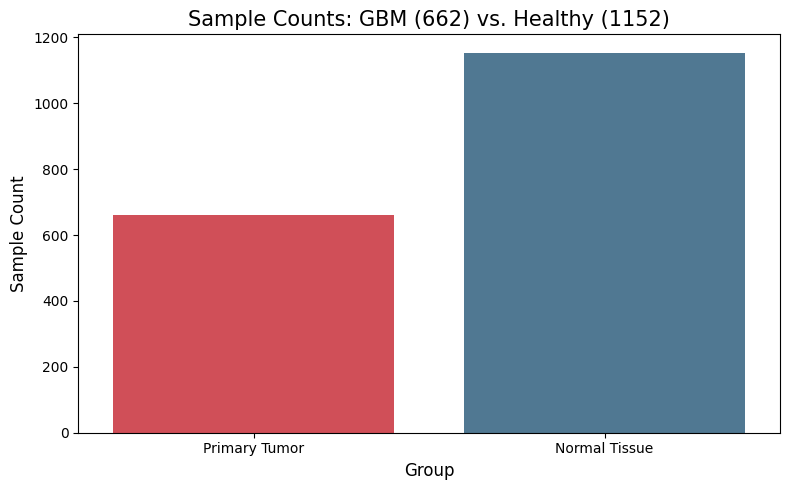

In [39]:
# --- 3. Create the single plot ---

plt.figure(figsize=(8, 5))

num_gbm = len(b_combined_metadata[b_combined_metadata['_sample_type']=='Primary Tumor'])
num_gtex = len(b_combined_metadata[b_combined_metadata['_sample_type']=='Normal Tissue'])
plot_title = f'Sample Counts: GBM ({num_gbm}) vs. Healthy ({num_gtex})'

sns.countplot(
    x='_sample_type', # Use x-axis for a vertical bar chart
    data=b_combined_metadata,
    hue='_sample_type', # Use hue to get colors
    legend=False,
    palette=['#E63946', '#457B9D'] # Red for unhealthy, Blue for healthy
)

plt.title(plot_title, fontsize=15)
plt.xlabel('Group', fontsize=12)
plt.ylabel('Sample Count', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# --- 1. Combine Metadata & Get Final Sample List ---
# We already created b_gbm_metadata and b_gtex_metadata in the last step
b_samples_to_keep = b_combined_metadata['sample'].tolist()

print(f"Total samples to keep for analysis: {len(b_samples_to_keep)}")

# --- 2. Filter Expression Data ---
# Select only the columns (samples) we want
# We use .copy() to prevent pandas warnings
b_filtered_tpm_df = b_xena_expression_df[
    b_xena_expression_df.columns.intersection(b_samples_to_keep)
].copy()

# --- 3. Clean Gene IDs ---
# Clean gene IDs (e.g., 'ENSG00000000003.15' -> 'ENSG00000000003')
b_filtered_tpm_df.index = b_filtered_tpm_df.index.str.split('.').str[0]

# Remove duplicate genes that might result from cleaning
b_filtered_tpm_df = b_filtered_tpm_df[~b_filtered_tpm_df.index.duplicated()]

print(f"Filtered expression matrix shape: {b_filtered_tpm_df.shape}")

# --- 4. Clip Negative Values ---
# Check for and count negative values
# negative_values_found = (b_filtered_tpm_df < 0).any().any()
# print(f"Negative values found in TPM data: {negative_values_found}")

# Force all negative values to 0
# b_filtered_tpm_clipped_df = b_filtered_tpm_df.clip(lower=0)

# --- 5. Log-Transform (This is the crucial step) ---
# Apply log2(x + 1) to the TPM values
# This creates our final data matrix for analysis
# data_B = np.log2(b_filtered_tpm_clipped_df + 1)
data_B = np.log2(b_filtered_tpm_df + 1)
# data_B = b_filtered_tpm_df

print("Log-transform applied.")

# --- 6. Verify Final `data_B` ---
print("\n--- Pipeline B Complete ---")
print(f"Final `data_B` matrix shape: {data_B.shape}")
display(data_B.head())

Total samples to keep for analysis: 1814
Filtered expression matrix shape: (60498, 1814)
Negative values found in TPM data: True
Log-transform applied.

--- Pipeline B Complete ---
Final `data_B` matrix shape: (60498, 1814)


c:\dev\ai-brain-tumor-2\.venv\Lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: invalid value encountered in log2
  result = func(self.values, **kwargs)


,TCGA-19-1787-01,TCGA-S9-A7J2-01,GTEX-13QIC-0011-R1a-SM-5O9CJ,TCGA-E1-A7YI-01,TCGA-06-5412-01,TCGA-DU-7302-01,TCGA-DU-A7TI-01,GTEX-N7MS-2526-SM-26GMA,GTEX-N7MS-2526-SM-26GMR,GTEX-NPJ7-0011-R6a-SM-2I3G7,...,TCGA-06-0745-01,GTEX-13G51-0011-R6b-SM-5LZX4,TCGA-TM-A84B-01,GTEX-YFC4-0011-R10a-SM-4SOK5,TCGA-DU-A76O-01,GTEX-13112-0011-R4b-SM-5DUXL,GTEX-1313W-0011-R1b-SM-5EQ4A,TCGA-CS-4944-01,TCGA-HT-7603-01,GTEX-Q2AG-2826-SM-2HMJQ
sample,,,,,,,,,,,,,,,,,,,,,
ENSG00000242268,NaN,0.378290,NaN,-0.868015,NaN,NaN,-1.393274,-1.236503,NaN,-1.312223,...,NaN,NaN,1.078405,-1.480357,NaN,NaN,NaN,NaN,NaN,0.062122
ENSG00000259041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000270112,NaN,NaN,NaN,-1.913760,0.204015,0.934705,NaN,2.238909,1.458854,-2.383831,...,1.147111,-2.835471,1.497842,1.174790,NaN,NaN,0.755315,NaN,1.045583,1.842054
ENSG00000167578,2.655306,2.557802,2.906679,2.757706,2.841712,2.729640,2.780499,2.809126,1.673285,2.685940,...,2.814140,2.739611,2.506120,2.913071,2.853257,2.702658,2.833052,2.936723,2.973795,2.767867
ENSG00000278814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualize Skewed samples

Visualizing data for sample: TCGA-19-1787-01


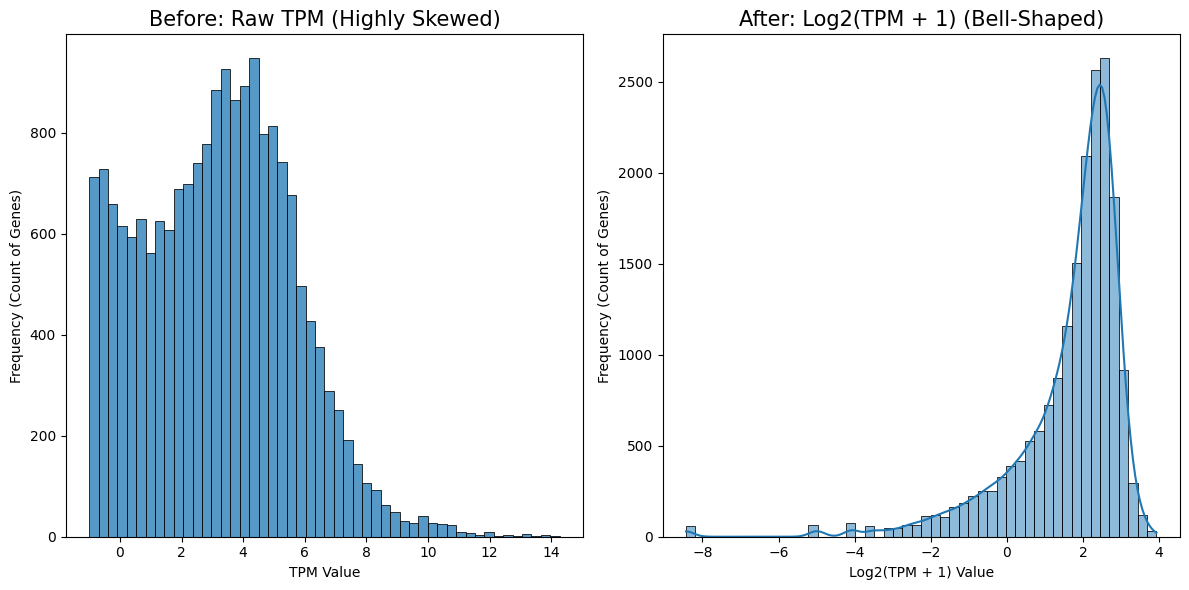

In [55]:
# --- 1. Select a Sample to Visualize ---
# We'll just pick the first sample in your dataset
sample_id = data_B.columns[0]
print(f"Visualizing data for sample: {sample_id}")

# --- 2. Get "Before" and "After" Data ---

# "After" data is easy, it's just the column from data_B
data_after_log = data_B[sample_id]
active_genes_after_log = data_after_log[data_after_log > 0]

# "Before" data is the raw TPM. We can reverse-calculate it from data_B.
# The formula was: data_B = np.log2(TPM + 1)
# The reverse is: TPM = (2**data_B) - 1
data_before_log_tpm = (2**data_after_log) - 1
active_genes_before_log = data_before_log_tpm[data_before_log_tpm > 0]


# --- 3. Create the Side-by-Side Plots ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# --- Plot 1: BEFORE Log Transform (Raw TPM) ---
# We plot a histogram of the raw TPM values
sns.histplot(data_before_log_tpm, ax=ax1, bins=50)
ax1.set_title('Before: Raw TPM (Highly Skewed)', fontsize=15)
ax1.set_xlabel('TPM Value')
ax1.set_ylabel('Frequency (Count of Genes)')
# Note: This plot will look "smashed" against the zero line. That's the point!

# --- Plot 2: AFTER Log Transform (data_B) ---
# We plot a histogram of the log-transformed data
sns.histplot(data_after_log, ax=ax2, bins=50, kde=True) # kde=True adds the smooth line
ax2.set_title('After: Log2(TPM + 1) (Bell-Shaped)', fontsize=15)
ax2.set_xlabel('Log2(TPM + 1) Value')
ax2.set_ylabel('Frequency (Count of Genes)')

plt.tight_layout()
plt.show()

Found most skewed sample: GTEX-145MI-0011-R7b-SM-5Q5AZ
Its skewness value is: 1.98 (a normal bell curve is ~0)


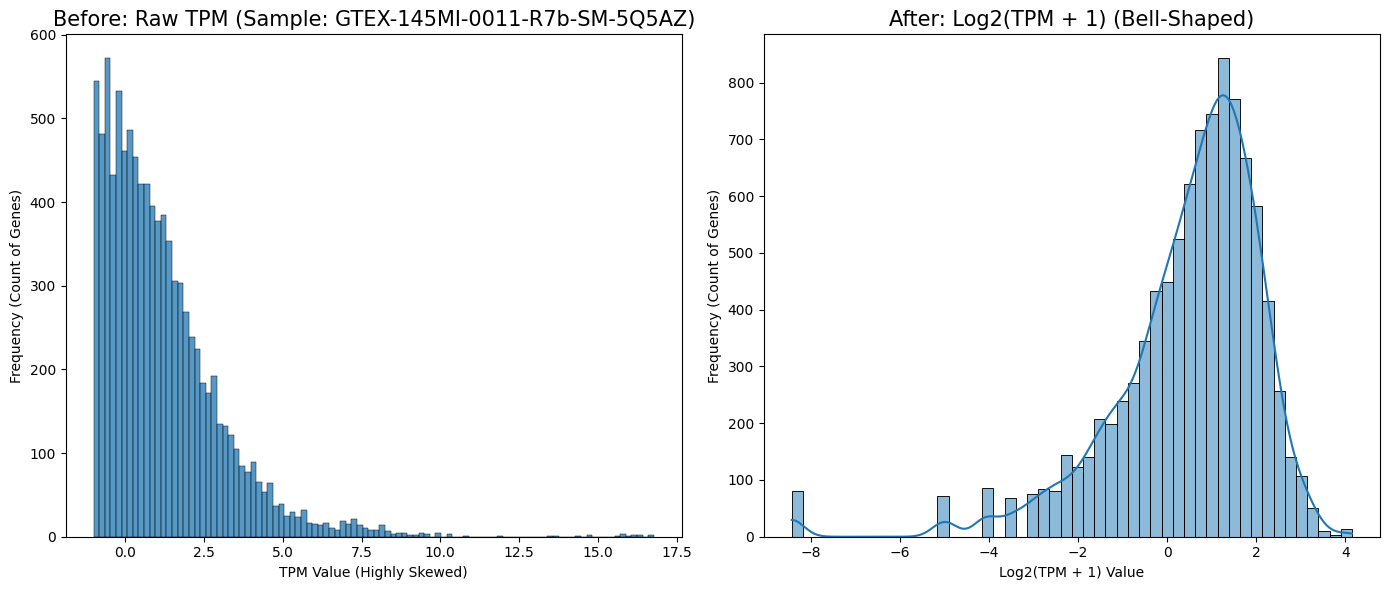

In [56]:
# This assumes 'data_B' is loaded from the previous step.

# --- 1. Find the Most Skewed Sample ---

# First, reverse-calculate the raw TPM for ALL samples
# The formula was: data_B = np.log2(TPM + 1)
# The reverse is: TPM = (2**data_B) - 1
raw_tpm_df = (2**data_B) - 1

# Calculate the 'skewness' for every sample (column)
sample_skewness = raw_tpm_df.skew()

# Find the sample ID with the HIGHEST skew value
extreme_sample_id = sample_skewness.idxmax()

print(f"Found most skewed sample: {extreme_sample_id}")
print(f"Its skewness value is: {sample_skewness.max():.2f} (a normal bell curve is ~0)")


# --- 2. Get "Before" and "After" Data for this Sample ---

# "After" data is this sample's column from data_B
data_after_log = data_B[extreme_sample_id]

# "Before" data is this sample's column from our raw_tpm_df
data_before_log_tpm = raw_tpm_df[extreme_sample_id]


# --- 3. Create the Side-by-Side Plots ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: BEFORE Log Transform (Raw TPM) ---
sns.histplot(data_before_log_tpm, ax=ax1, bins=100)
ax1.set_title(f'Before: Raw TPM (Sample: {extreme_sample_id})', fontsize=15)
ax1.set_xlabel('TPM Value (Highly Skewed)')
ax1.set_ylabel('Frequency (Count of Genes)')

# --- Plot 2: AFTER Log Transform (data_B) ---
sns.histplot(data_after_log, ax=ax2, bins=50, kde=True) # kde=True adds the smooth line
ax2.set_title('After: Log2(TPM + 1) (Bell-Shaped)', fontsize=15)
ax2.set_xlabel('Log2(TPM + 1) Value')
ax2.set_ylabel('Frequency (Count of Genes)')

plt.tight_layout()
plt.show()

### duplicate & NA filtering

In [57]:
# This code assumes 'data_B' is loaded from the previous step.

print(f"Original shape of data_B: {data_B.shape}")

# --- 1. Check for Duplicate Genes (Rows) ---
# data_B.index is the list of gene IDs.
genes_duplicated = data_B.index.duplicated().sum()
print(f"Duplicate genes (rows) found: {genes_duplicated}")

# (No removal step needed, as we already did it)


# --- 2. Check for Duplicate Samples (Columns) ---
# This checks if any two samples are 100% identical.
# We must transpose (.T) the data so 'duplicated()' checks the samples.
samples_duplicated = data_B.T.duplicated().sum()
print(f"Duplicate samples (columns) found: {samples_duplicated}")

if samples_duplicated > 0:
    print("Removing duplicate samples...")
    # We transpose, drop the duplicates, and transpose back.
    data_B = data_B.T.drop_duplicates().T
    print(f"New shape after dropping duplicate samples: {data_B.shape}")


# --- 3. Check for NA (Missing) Values ---
# data_B.isna().any() checks each column for NAs.
# .any() again checks if *any* column returned True.
na_values_found = data_B.isna().any().any()
print(f"NA (missing) values found: {na_values_found}")

if na_values_found:
    # An NA value will break the model. The best strategy
    # is to remove the entire gene (row) that contains an NA.
    original_gene_count = data_B.shape[0]
    
    # .dropna(axis=0) drops any ROW (gene) containing an NA.
    data_B = data_B.dropna(axis=0) 
    
    genes_removed = original_gene_count - data_B.shape[0]
    print(f"Removed {genes_removed} genes that contained NA values.")
    print(f"New shape after dropping NA genes: {data_B.shape}")


# --- Final Verification ---
print("\n--- Cleaning Complete ---")
print(f"Final `data_B` matrix shape: {data_B.shape}")

Original shape of data_B: (60498, 1814)
Duplicate genes (rows) found: 0
Duplicate samples (columns) found: 0
NA (missing) values found: True
Removed 60368 genes that contained NA values.
New shape after dropping NA genes: (130, 1814)

--- Cleaning Complete ---
Final `data_B` matrix shape: (130, 1814)


### Variance filtering

In [58]:
print(f"Original shape of data_B: {data_B.shape}")

# --- 1. Calculate Variance ---
# We calculate variance for each gene (row) across all samples (axis=1)
gene_variances = data_B.var(axis=1)

# --- 2. Define the Filter ---
# We want to keep any gene where the variance is greater than 0
variance_filter = gene_variances > 0

# --- 3. Apply the Filter ---
data_B_filtered = data_B[variance_filter]

# --- 4. Verify ---
genes_removed = data_B.shape[0] - data_B_filtered.shape[0]
print(f"Removed {genes_removed} genes with zero variance.")
print(f"New filtered shape: {data_B_filtered.shape}")

# --- 5. IMPORTANT: Overwrite data_B ---
# We overwrite our old data_B with the new, filtered version
data_B = data_B_filtered
print("`data_B` has been updated.")

Original shape of data_B: (130, 1814)
Removed 0 genes with zero variance.
New filtered shape: (130, 1814)
`data_B` has been updated.


In [59]:
data_B.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, ENSG00000182872 to ENSG00000160584
Columns: 1814 entries, TCGA-19-1787-01 to GTEX-Q2AG-2826-SM-2HMJQ
dtypes: float64(1814)
memory usage: 1.8+ MB


In [60]:
# --- 1. Define Output Filenames ---
scaled_data_filepath = "data/processed/data_B_scaled.csv"
labels_filepath = "data/processed/data_B_labels.csv"

# --- 2. Prepare Data for Scaling ---
data_B_T = data_B.T

# --- 3. Apply StandardScaler ---
scaler = StandardScaler()
data_B_scaled_array = scaler.fit_transform(data_B_T)

# --- 4. Convert Scaled Data Back to DataFrame ---
data_B_scaled_df = pd.DataFrame(
    data_B_scaled_array,
    index=data_B_T.index,
    columns=data_B_T.columns
)

# --- 5. Save Scaled Data (FIXED) ---
# We add index_label='sample_id' to name the first column
data_B_scaled_df.to_csv(scaled_data_filepath, index_label='sample_id')
print(f"Scaled data saved to: {scaled_data_filepath}")

# --- 6. Prepare and Save Labels ---
labels_df = b_combined_metadata.set_index('sample').copy()
labels_df['label'] = labels_df['_study'].map({
    'TCGA': 1,  # 1 = GBM
    'GTEX': 0   # 0 = Healthy
})
final_labels_df = labels_df[['label']]

# --- 7. Save Labels (FIXED) ---
# We add index_label='sample_id' here too for consistency
final_labels_df.to_csv(labels_filepath, index_label='sample_id')
print(f"Labels saved to: {labels_filepath}")

Scaled data saved to: data/processed/data_B_scaled.csv
Labels saved to: data/processed/data_B_labels.csv
